In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


Importing Amazon Textract

In [4]:
# !python -m pip install amazon-textract-caller --upgrade
# !python -m pip install amazon-textract-response-parser --upgrade

In [5]:
# import boto3
# from IPython.display import Image, display
# from trp import Document
# from PIL import Image as PImage, ImageDraw
# import time
# from IPython.display import IFrame

In [6]:
# Curent AWS Region. Use this to choose corresponding S3 bucket with sample content

# mySession = boto3.session.Session()
# awsRegion = mySession.region_name

# print(mySession, awsRegion)

In [4]:
# S3 bucket that contains sample documents

# We are providing sample documents in this bucket so
# you do not have to manually download/upload test documents.

s3BucketName = "aws-workshops-" + awsRegion

In [ ]:
# Document
documentPath = "../input/pdf-samples/Esempio ordini/CAMBIO CASSONE SPAZIO SOC COOP PISTOIA 19.01.2022.pdf"

In [ ]:
IFrame(s3.generate_presigned_url('get_object', Params={'Bucket': s3BucketName, 'Key': documentName}), 900, 400)

## Reading pdf file and it's extracted values.

In [8]:
!pip install install libmagickwand-dev
!pip install ImageMagick
!pip install Wand

ERROR: Could not find a version that satisfies the requirement libmagickwand-dev (from versions: none)
ERROR: No matching distribution found for libmagickwand-dev
ERROR: Could not find a version that satisfies the requirement ImageMagick (from versions: none)
ERROR: No matching distribution found for ImageMagick


In [9]:
from wand.image import Image
from wand.display import display

from wand.image import Image as WImage
img = WImage(filename='Esempio ordini//CAMBIO CASSONE SPAZIO SOC COOP PISTOIA 19.01.2022.pdf')
img

ImportError: MagickWand shared library not found.
You probably had not installed ImageMagick library.
Try to install:
  https://docs.wand-py.org/en/latest/guide/install.html#install-imagemagick-on-windows

### reading files one by one

In [19]:
path_keyValues = 'Esempio ordini\CAMBIO CASSONE SPAZIO SOC COOP PISTOIA 19.01.2022\keyValues.csv'
# path_queryAnsr = '../input/pdf-reciept1/CAMBIO CASSONE SPAZIO SOC COOP PISTOIA 19.01.2022/queryAnswers.csv'
# path_table1 = '../input/pdf-reciept1/CAMBIO CASSONE SPAZIO SOC COOP PISTOIA 19.01.2022/table-1.csv'
# path_table2 = '../input/pdf-reciept1/CAMBIO CASSONE SPAZIO SOC COOP PISTOIA 19.01.2022/table-2.csv'
# path_table3 = '../input/pdf-reciept1/CAMBIO CASSONE SPAZIO SOC COOP PISTOIA 19.01.2022/table-3.csv'
# path_table4 = '../input/pdf-reciept1/CAMBIO CASSONE SPAZIO SOC COOP PISTOIA 19.01.2022/table-4.csv'
# path_table5 = '../input/pdf-reciept1/CAMBIO CASSONE SPAZIO SOC COOP PISTOIA 19.01.2022/table-5.csv'
# path_table6 = '../input/pdf-reciept1/CAMBIO CASSONE SPAZIO SOC COOP PISTOIA 19.01.2022/table-6.csv'

In [20]:
dfKeyValue = pd.read_csv(path_keyValues)
# dfQueryAnsr = pd.read_csv(path_queryAnsr)
# df_table1 = pd.read_csv(path_table1)
# df_table2 = pd.read_csv(path_table2)
# df_table3 = pd.read_csv(path_table3)
# df_table4 = pd.read_csv(path_table4)
# df_table5 = pd.read_csv(path_table5)
# df_table6 = pd.read_csv(path_table6)

Preprocessing Key Value df

In [21]:
dfKeyValue.head(5)

,key,value
0,'PRODUTTORE,'SPAZIO SOC COOP
1,'CLIENTE,'SPAZIO SOC COOP
2,'Unit. Loc.,"'Via S. Agostino, 2 51100 PISTOIA (PT)"
3,'Operatore,'Francesca Buffolino - Mob. 327 6613420
4,'Referente,'MICHELE


In [22]:
dfKeyValue.shape

(36, 2)

In [24]:
!pip install pytesseract

  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:
      Successfully uninstalled packaging-20.9


In [25]:
import pytesseract
import shutil
import os
import random
try:
  from PIL import Image
except ImportError:
  import Image

In [26]:
!pip install google-colab

     ---------------------------------------- 72.9/72.9 KB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 64.2/64.2 KB ? eta 0:00:00
     ---------------------------------------- 104.5/104.5 KB ? eta 0:00:00
     ------------------------------------- 758.9/758.9 KB 15.9 MB/s eta 0:00:00
     ---------------------------------------- 8.0/8.0 MB 23.3 MB/s eta 0:00:00
     --------------------------------------- 11.8/11.8 MB 26.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): still running...
  Preparing metadata (setup.py): still running...
  Preparing metadata (setup.py): still running...

  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [850 lines of output]
      C:\Users\sande\AppData\Local\Temp\pip-install-25vtglp8\pandas_3a164cd9ae2f4cd3b38b0081d5b203e6\setup.py:50: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
        _CYTHON_INSTALLED = ver >= LooseVersion(min_cython_ver)
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-38
      creating build\lib.win-amd64-cpython-38\pandas
      copying pandas\conftest.py -> build\lib.win-amd64-cpython-38\pandas
      copying pandas\testing.py -> build\lib.win-amd64-cpython-38\pandas
      copying pandas\_version.py -> build\lib.win-amd64-cpython-38\pandas
      copying pandas\__init__.py -> build\lib.win-amd64-cpython-38\pandas
      creating build\lib.win-amd64-cpython-38\pandas\api
      copying pandas\api\__init__.py -> buil


  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 58.0/58.0 KB ? eta 0:00:00
     ------------------------------------- 484.2/484.2 KB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------- 245.4/245.4 KB 14.7 MB/s eta 0:00:00
     ---------------------------------------- 58.6/58.6 KB 3.2 MB/s eta 0:00:00
     -------------------------------------- 133.4/133.4 KB 8.2 MB/s eta 0:00:00
     -------------------------------------- 118.8/118.8 KB 6.8 MB/s eta 0:00:00
  Created wheel for google-colab: filename=google_colab-1.0.0-py2.py3-none-any.whl size=102294 sha256=efd7119fb9cf56ca218a8ac163f29cf260c6f35fcab02c5f5b41342940f08186
  Stored in directory: c:\users\sande\appdata\local\pip\cache\wheels\e4\e7\91\b2736701bca00e27

      copying pandas\tests\test_compat.py -> build\lib.win-amd64-cpython-38\pandas\tests
      copying pandas\tests\test_config.py -> build\lib.win-amd64-cpython-38\pandas\tests
      copying pandas\tests\test_downstream.py -> build\lib.win-amd64-cpython-38\pandas\tests
      copying pandas\tests\test_errors.py -> build\lib.win-amd64-cpython-38\pandas\tests
      copying pandas\tests\test_expressions.py -> build\lib.win-amd64-cpython-38\pandas\tests
      copying pandas\tests\test_join.py -> build\lib.win-amd64-cpython-38\pandas\tests
      copying pandas\tests\test_lib.py -> build\lib.win-amd64-cpython-38\pandas\tests
      copying pandas\tests\test_multilevel.py -> build\lib.win-amd64-cpython-38\pandas\tests
      copying pandas\tests\test_nanops.py -> build\lib.win-amd64-cpython-38\pandas\tests
      copying pandas\tests\test_panel.py -> build\lib.win-amd64-cpython-38\pandas\tests
      copying pandas\tests\test_register_accessor.py -> build\lib.win-amd64-cpython-38\pandas\tests
   

In [27]:
!pip install pdf2image


  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.3.3
    Uninstalling google-auth-2.3.3:
      Successfully uninstalled google-auth-2.3.3
  Attempting uninstall: pandas
    Found existing installation: pandas 1.2.4
    Uninstalling pandas-1.2.4:
      Successfully uninstalled pandas-1.2.4
  Running setup.py install for pandas: started
  Running setup.py install for pandas: still running...
  Running setup.py install for pandas: still running...
  Running setup.py install for pandas: still running...
  Running setup.py install for pandas: finished with status 'error'
  Rolling back uninstall of pandas
  Moving to c:\users\sande\anaconda3\lib\site-packages\pandas-1.2.4.dist-info\
   from C:\Users\sande\anaconda3\Lib\site-packages\~andas-1.2.4.dist-info
  Moving to c:\users\sande\anaconda3\lib\site-packages\pandas\
   from C:\Users\sande\anaconda3\Lib\site-packages\~andas


      [30/36] Cythonizing pandas\_libs/tslibs/resolution.pyx
      [31/36] Cythonizing pandas\_libs/tslibs/strptime.pyx
      [32/36] Cythonizing pandas\_libs/tslibs/timedeltas.pyx
      [33/36] Cythonizing pandas\_libs/tslibs/timestamps.pyx
      [34/36] Cythonizing pandas\_libs/tslibs/timezones.pyx
      [35/36] Cythonizing pandas\_libs/writers.pyx
      [36/36] Cythonizing pandas\io/sas/sas.pyx
      running install
      c:\users\sande\anaconda3\lib\site-packages\setuptools\command\install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
        warnings.warn(
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-38
      creating build\lib.win-amd64-cpython-38\pandas
      copying pandas\conftest.py -> build\lib.win-amd64-cpython-38\pandas
      copying pandas\testing.py -> build\lib.win-amd64-cpython-38\pandas
      copying pandas\_version.py -> build\lib.wi

In [31]:
!pip install opencv-python

     --------------------------------------- 35.4/35.4 MB 27.3 MB/s eta 0:00:00



In [32]:
import numpy as np
import random
import cv2
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
# from google.colab.patches import cv2_imshow
from pdf2image import convert_from_path
# !pip install poppler-utils

In [33]:
#Reading the files
receipt_files=glob('Esempio ordini//*pdf')
receipt_files

['Esempio ordini\\CAMBIO CASSONE SPAZIO SOC COOP PISTOIA 19.01.2022.pdf',
 'Esempio ordini\\ORDINE DI RITIRO FATTO INSIEME 17.02.22.pdf',
 'Esempio ordini\\RITIRO 2G2 PER EURO 20.01.2022.pdf',
 'Esempio ordini\\RITIRO ALSTOM SISEA ECOVIP 20.01.22(1).pdf',
 'Esempio ordini\\RITIRO ALSTOM SISEA ECOVIP 20.01.22.pdf',
 'Esempio ordini\\RITIRO ALSTOM SISEA PRODURRE PULITO 161002  20.01.22.pdf',
 'Esempio ordini\\TRASPORTO MERCE wenda.pdf']

In [36]:
# from wand.image import Image as WImage
image_files = []
for i in receipt_files:
    print(i)
    pages = convert_from_path(i)
    for page in pages:
        print(page)
        # page.save("page_image.jpg", "jpg")

Esempio ordini\CAMBIO CASSONE SPAZIO SOC COOP PISTOIA 19.01.2022.pdf


PDFInfoNotInstalledError: Unable to get page count. Is poppler installed and in PATH?

In [38]:
!pip install PyMuPDF==1.16.14
import fitz

     ---------------------------------------- 4.9/4.9 MB 19.6 MB/s eta 0:00:00


In [18]:
# import os
# os.remove("./../input/pdf-samples/Esempio ordini/RITIRO ALSTOM SISEA ECOVIP 20.01.22(1).pdf0.jpg")
# !rm -rf <'./pdf_images'>
# shutil.rmtree('./pdf_images')

In [42]:

from pathlib import Path
Path("C://Users//sande//Documents//GitHub//Wenda_OCR//converted_pdf2img").mkdir(parents=True, exist_ok=True)
fileCount  = 0
out_path = 'C://Users//sande//Documents//GitHub//Wenda_OCR//converted_pdf2img//'

zoom = 2 # to increase the resolution
mat = fitz.Matrix(zoom, zoom)
for i in receipt_files:
    pdffile = i
    doc = fitz.open(pdffile)
    print("Number of pages: ", doc.pageCount)
    for j in range(doc.pageCount):
        page = doc.loadPage(j)
        pix = page.getPixmap(matrix = mat)
        output = out_path +str(fileCount) + str(j) + '.jpg' # you could change image format accordingly
        
        print(output)
        pix.writePNG(output)
        print('Converting PDFs to Image ... ' + output)
    fileCount += 1
# page = doc.loadPage(0)  # number of page
# pix = page.get_pixmap()
# output = "outfile.png"
# pix.save(output)

Number of pages:  2
C://Users//sande//Documents//GitHub//Wenda_OCR//converted_pdf2img//00.jpg
Converting PDFs to Image ... C://Users//sande//Documents//GitHub//Wenda_OCR//converted_pdf2img//00.jpg
C://Users//sande//Documents//GitHub//Wenda_OCR//converted_pdf2img//01.jpg
Converting PDFs to Image ... C://Users//sande//Documents//GitHub//Wenda_OCR//converted_pdf2img//01.jpg
Number of pages:  2
C://Users//sande//Documents//GitHub//Wenda_OCR//converted_pdf2img//10.jpg
Converting PDFs to Image ... C://Users//sande//Documents//GitHub//Wenda_OCR//converted_pdf2img//10.jpg
C://Users//sande//Documents//GitHub//Wenda_OCR//converted_pdf2img//11.jpg
Converting PDFs to Image ... C://Users//sande//Documents//GitHub//Wenda_OCR//converted_pdf2img//11.jpg
Number of pages:  2
C://Users//sande//Documents//GitHub//Wenda_OCR//converted_pdf2img//20.jpg
Converting PDFs to Image ... C://Users//sande//Documents//GitHub//Wenda_OCR//converted_pdf2img//20.jpg
C://Users//sande//Documents//GitHub//Wenda_OCR//convert

In [77]:
os.chdir('/')
image_files_rel_path = glob('converted_pdf2img/*jpg')
image_files_rel_path

['converted_pdf2img\\00.jpg',
 'converted_pdf2img\\01.jpg',
 'converted_pdf2img\\10.jpg',
 'converted_pdf2img\\11.jpg',
 'converted_pdf2img\\20.jpg',
 'converted_pdf2img\\21.jpg',
 'converted_pdf2img\\30.jpg',
 'converted_pdf2img\\31.jpg',
 'converted_pdf2img\\40.jpg',
 'converted_pdf2img\\41.jpg',
 'converted_pdf2img\\50.jpg',
 'converted_pdf2img\\51.jpg',
 'converted_pdf2img\\60.jpg',
 'converted_pdf2img\\61.jpg']

In [75]:
os.chdir('/converted_pdf2img')
image_files_names = glob('*jpg')
image_files_names

['00.jpg',
 '01.jpg',
 '10.jpg',
 '11.jpg',
 '20.jpg',
 '21.jpg',
 '30.jpg',
 '31.jpg',
 '40.jpg',
 '41.jpg',
 '50.jpg',
 '51.jpg',
 '60.jpg',
 '61.jpg']

In [64]:
from os import listdir
from PIL import Image as PImage
def loadImages(path):
    # return array of images

    imagesList = listdir(path)
    loadedImages = []
    for image in imagesList:
        img = PImage.open(path + image)
        loadedImages.append(img)

    return loadedImages

In [65]:
path = "converted_pdf2img/"

# your images in an array
image_files = loadImages(path)

# for img in image_files:
#     # you can show every image
#     img.show()

<Figure size 432x288 with 0 Axes>

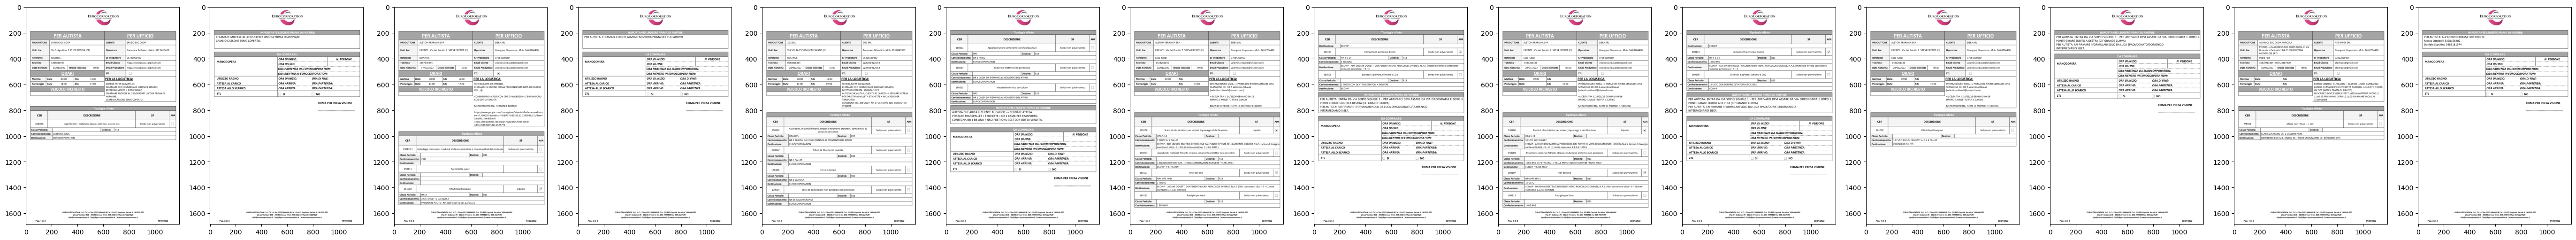

In [66]:
plt.figure()
f, axarr = plt.subplots(1,len(image_files), figsize=(70, 50), dpi=100)
for i in range(len(image_files)):
    axarr[i].imshow(image_files[i])
plt.show()

Implementing OCRmyPDF

In [68]:
!pip install ocrmypdf
import ocrmypdf

C:\Users\sande\anaconda3\lib\site-packages\pkg_resources\__init__.py:123: PkgResourcesDeprecationWarning: 4.0.0-unsupported is an invalid version and will not be supported in a future release
  warnings.warn(


In [79]:
save_path = 'C://Users//sande//Documents//GitHub//Wenda_OCR//results_afterOCR'
ocrmypdf.ocr('C://Users//sande//Documents//GitHub//Wenda_OCR//converted_pdf2img//00.jpg', save_path)

[WinError 2] The system cannot find the file specified
[WinError 2] The system cannot find the file specified


FileNotFoundError: [WinError 2] The system cannot find the file specified

### Implementing tesseract OCR

##### Preprocessing the image before implementing OCR

In [111]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones([5,5],np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

In [112]:

image = cv2.imread('converted_pdf2img//30.jpg')

gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)

<Figure size 432x288 with 0 Axes>

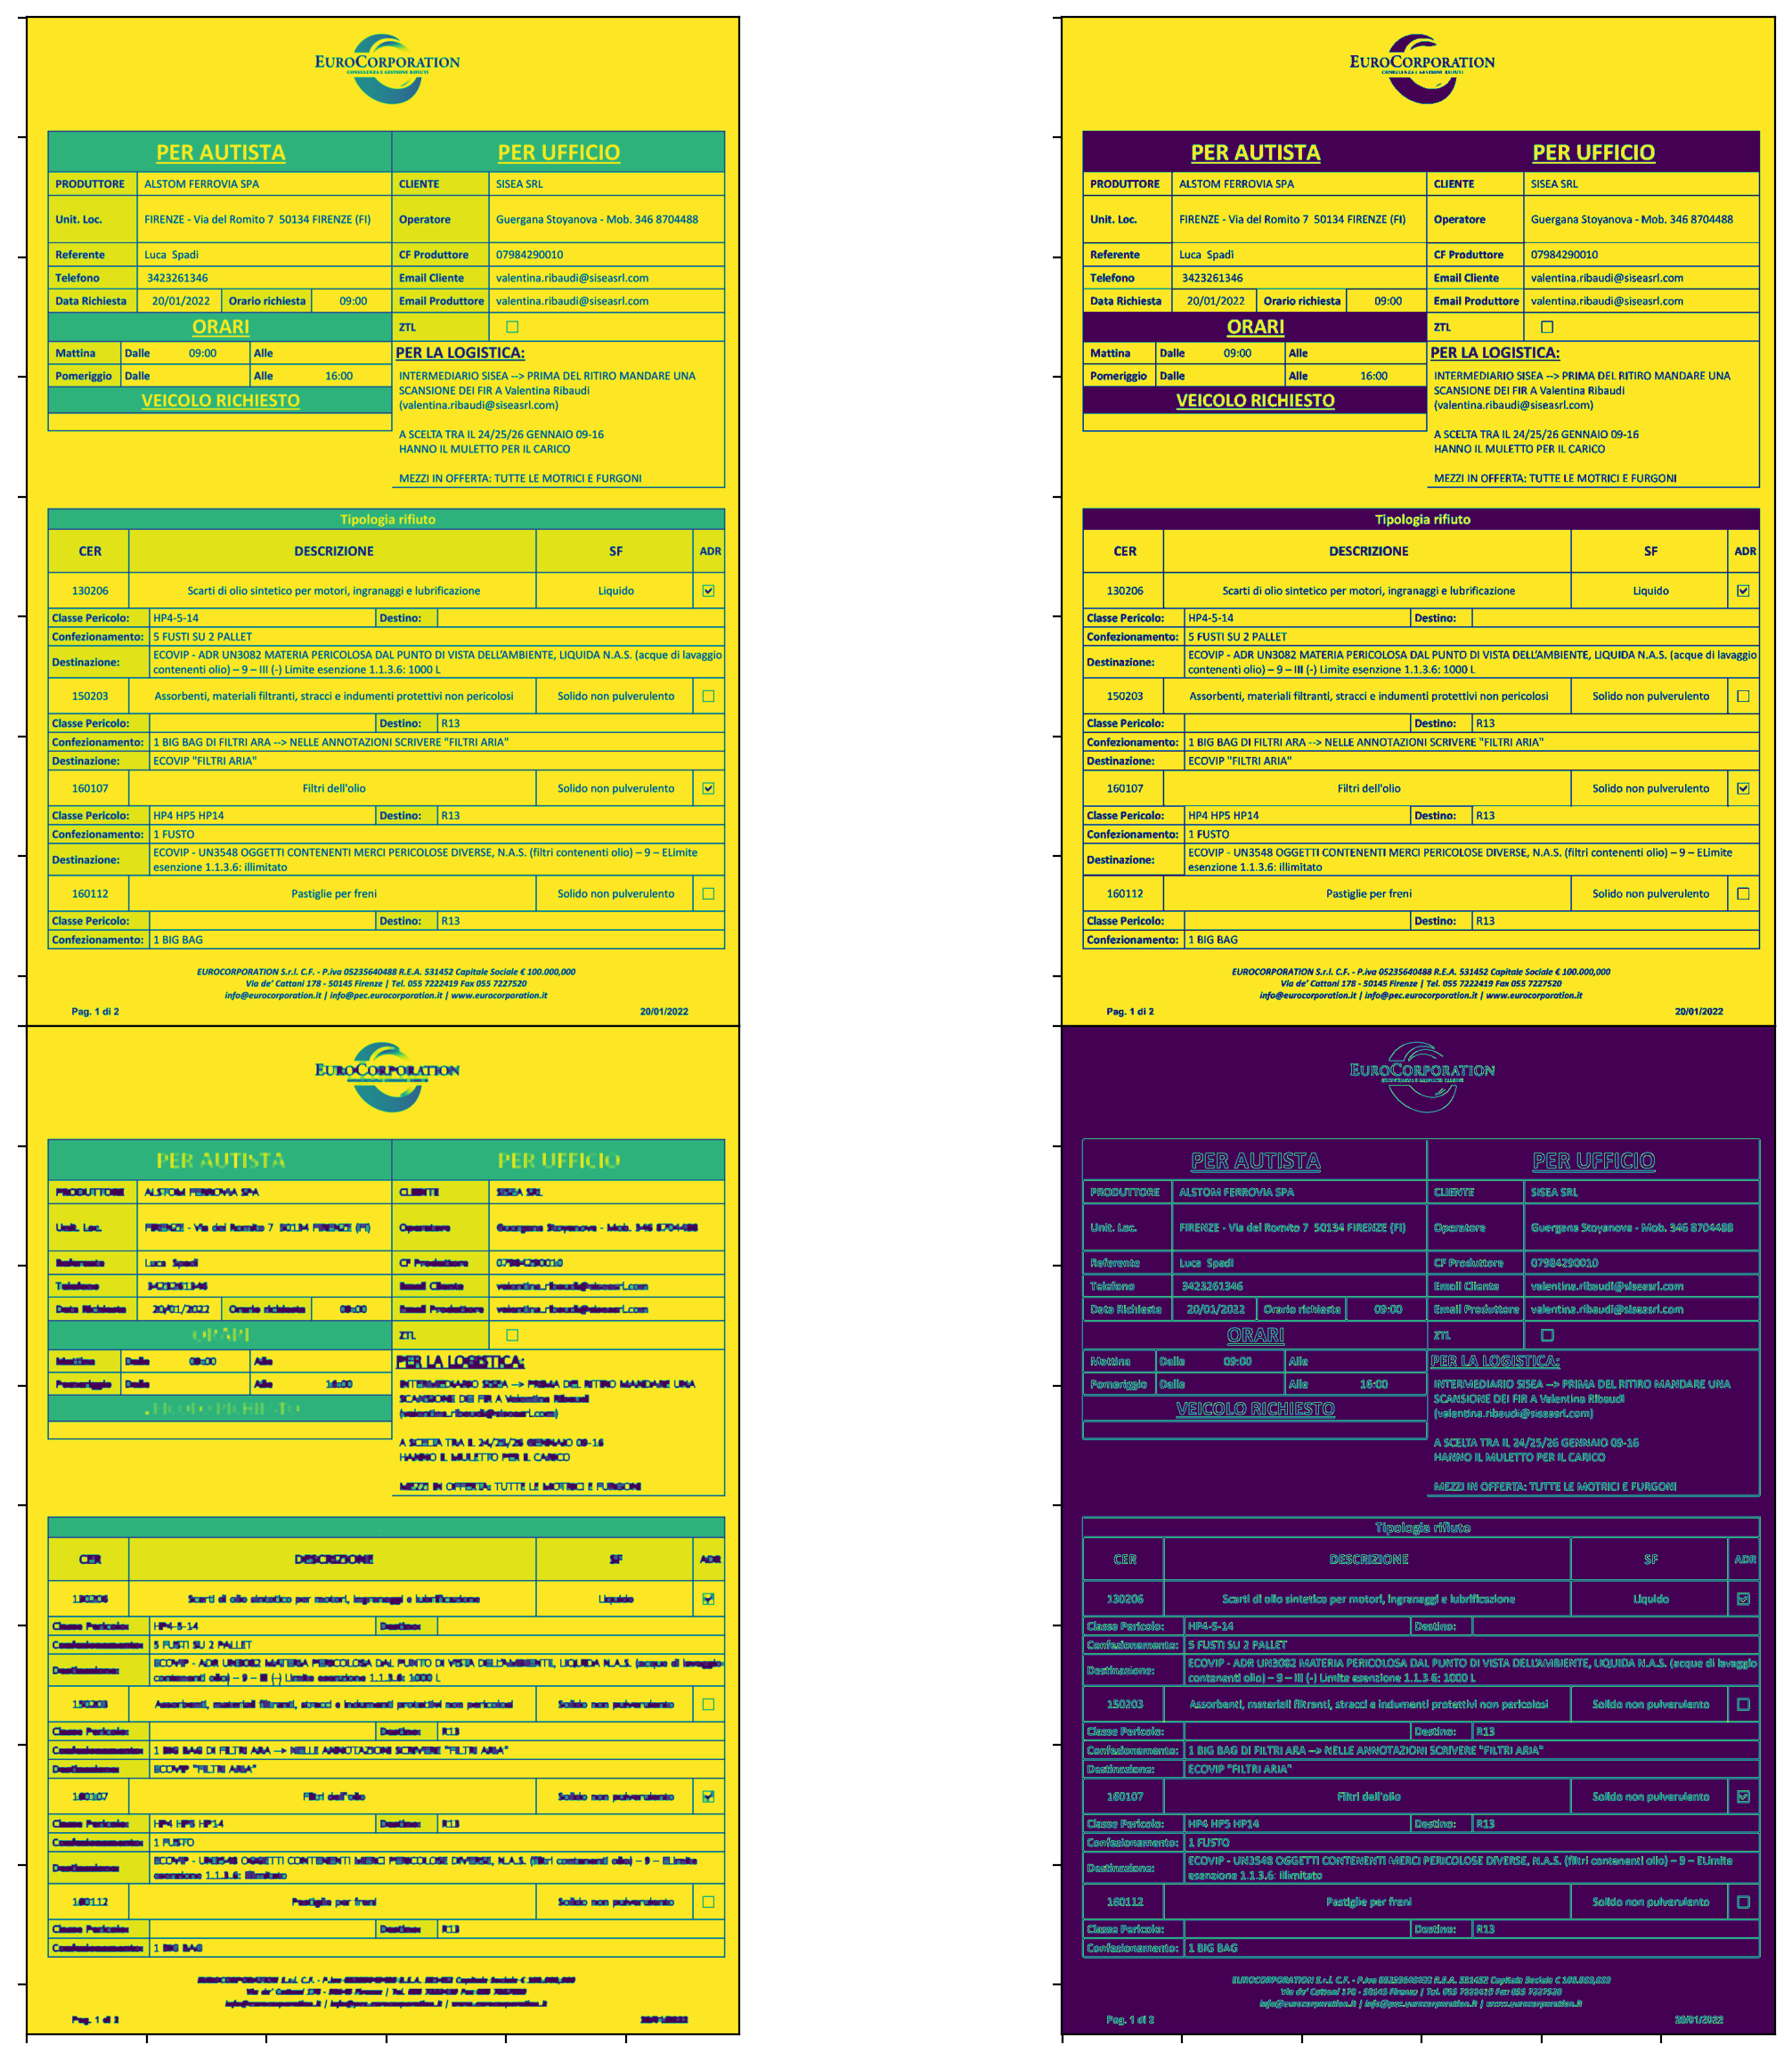

In [123]:
# plt.figure(figsize=(15,15))
# plt.imshow(image)

plt.figure()
f, axarr = plt.subplots(2,2, figsize=(15, 15), dpi=200)

axarr[0][0].imshow(gray)
axarr[0][1].imshow(thresh)
axarr[1][0].imshow(opening)
axarr[1][1].imshow(canny)
for i, ax in enumerate(f.axes):
    ax.set_xticklabels([])
    ax.set_yticklabels([])
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [96]:
cv2.imshow('converted_pdf2img//30.jpg', cmap = 'gray')

error: OpenCV(4.5.5) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)


In [91]:
pytesseract.pytesseract.tesseract_cmd = 'C://Program Files//Tesseract-OCR//tesseract.exe'

In [93]:
!pip install tesseract
!pip install tesseract-ocr

     --------------------------------------- 45.6/45.6 MB 15.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for tesseract: filename=tesseract-0.1.3-py3-none-any.whl size=45562571 sha256=472dd7f97ee243d98b5003765268606bc85c7b57028868c65d02862d26a0ad00
  Stored in directory: c:\users\sande\appdata\local\pip\cache\wheels\7f\a1\69\fabe07004553a36d818e4657fed410daf525fe1ae161f469d3
Successfully built tesseract
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for tesseract-ocr
Failed to build tesseract-ocr
  Running setup.py install for tesseract-ocr: started
  Running setup.py install for tesseract-ocr: finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [16 lines of output]
      c:\users\sande\anaconda3\lib\site-packages\setuptools\dist.py:757: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
        warnings.warn(
      running bdist_wheel
      running build
      running build_py
      file tesseract_ocr.py (for module tesseract_ocr) not found
      file tesseract_ocr.py (for module tesseract_ocr) not found
      running build_ext
      building 'tesseract_ocr' extension
      creating build
      creating build\temp.win-amd64-cpython-38
      creating build\temp.win-amd64-cpython-38\Release
      "C:\Program Files\Microsoft Visual Studio\2022\Community\VC\Tools\MSVC\14.31.31103\bin\HostX86\x64\cl.exe" /c /nologo /O2 /W3 /GL /DNDEBUG /MD -Ic:\users\sande\anaconda3\include -Ic:\users\sande\anaconda3\Include

“=~

EUROCORPORATION

lw

ER UFFICIO

PRODUTTORE | SPAZIO SOC COOP CLIENTE SPAZIO SOC COOP
Unit. Loc. Via S. Agostino, 2 51100 PISTOIA (PT) Operatore Francesca Buffolino - Mob. 327 6613420
Referente MICHELE . CF Produttore 06721950480
Telefono 3395833947 Email Cliente magazzinologistical@gmail.com
Data Richiesta 19/01/2022 | Orario richiesta 10:00 Email Produttore | magazzinologistical @gmail.com
ZTL
Mattina Dalle 09:00 Alle 13:00 PER LA LOGISTICA:
Pomeriggio | Dalle 14:00 Alle 17:00 SCHEDA FATTA DA MATILDE.

CHIAMARE PER COMUNICARE GIORNO E ORARIO.
VEICOLO RICHIESTO PREFERIBILMENTE IL POMERIGGIO

CHIAMARE MICHELE AL 339/5833947 UN'ORA PRIMA DI
ARRIVARE.

CAMBIO CASSONE 30MC COPERTO.

Tipologia rifiuto

CER DESCRIZIONE SF ADR
200307. Ingombranti - materassi, divani, poltrone, cuscini, etc. Solido non pulverulento
Classe Pericolo: Destino: | R13
Confezionamento: | CASSONE 30MC
Destinazione: EUROCORPORATION

EUROCORPORATION S.r.J. C.F. - P.iva 05235640488 R.E.A. 531452 Capitale Sociale €

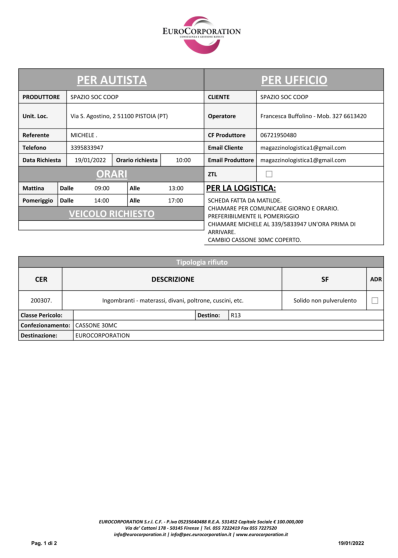

In [97]:
receipt_0=Image.open('converted_pdf2img//00.jpg')
print(pytesseract.image_to_string(receipt_0))
plt.figure(figsize=(10,10))
plt.imshow(receipt_0)
plt.axis('off')
plt.show()

#### Getting the bouding boxes on the images

21799
h 1684 w 1190


(-0.5, 1189.5, 1683.5, -0.5)

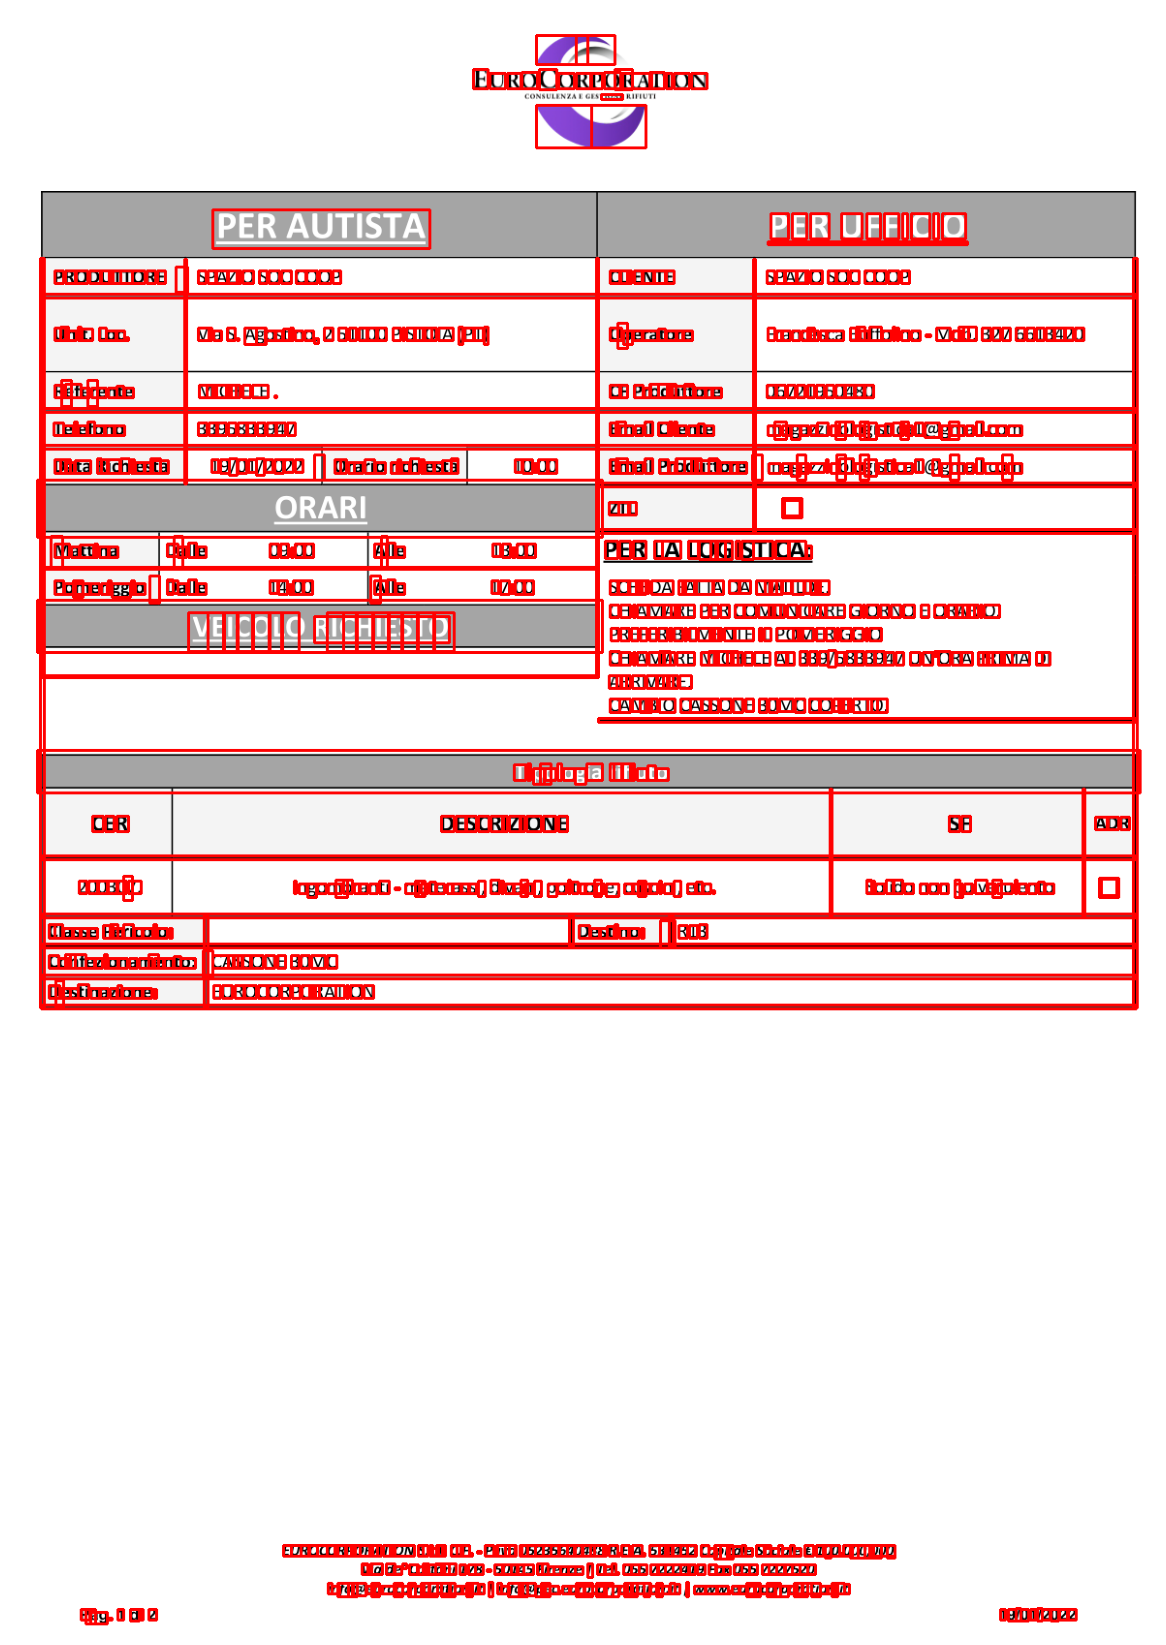

In [101]:
#  get characters and correspongding position
ocr_out = pytesseract.image_to_boxes('converted_pdf2img//00.jpg')
# print(pytesseract.image_to_data(receipt_0))
print(len(ocr_out))

#  plot position of each character detected on the image
img = cv2.imread('converted_pdf2img//00.jpg')
h, w, _ = img.shape
print("h",h,"w",w)
for bbox in ocr_out.split('\n')[:-1]:
    split = bbox.split(' ')
#     print(split)
    text = split[0]
#     print(text)
    point1 = (int(split[1]), h - int(split[2]))
    point2 = (int(split[3]), h - int(split[4]))
    img = cv2.rectangle(img,point1,point2,(255,0,0),2)
plt.figure(figsize=(30,30))
plt.imshow(img)
plt.axis('off')


# img = cv2.imread(receipt_files[3])
# h, w, _ = img.shape
# for b in ocr_out.splitlines():
#     b = b.split(' ')
#     img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)
# cv2_imshow(img)

In [102]:
a=pytesseract.image_to_data('converted_pdf2img//00.jpg')
print(a)

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	1190	1684	-1	
2	1	1	0	0	0	546	29	81	30	-1	
3	1	1	1	0	0	546	29	81	30	-1	
4	1	1	1	1	0	546	29	81	30	-1	
5	1	1	1	1	1	546	29	81	30	16.636894	“=~
2	1	2	0	0	0	481	64	241	21	-1	
3	1	2	1	0	0	481	64	241	21	-1	
4	1	2	1	1	0	481	64	241	21	-1	
5	1	2	1	1	1	481	64	241	21	91.190765	EUROCORPORATION
2	1	3	0	0	0	546	101	113	44	-1	
3	1	3	1	0	0	546	101	113	44	-1	
4	1	3	1	1	0	546	101	113	44	-1	
5	1	3	1	1	1	546	101	113	44	19.889114	lw
2	1	4	0	0	0	613	90	22	5	-1	
3	1	4	1	0	0	613	90	22	5	-1	
4	1	4	1	1	0	613	90	22	5	-1	
5	1	4	1	1	1	613	90	22	5	95.000000	 
2	1	5	0	0	0	788	213	18	26	-1	
3	1	5	1	0	0	788	213	18	26	-1	
4	1	5	1	1	0	788	213	18	26	-1	
5	1	5	1	1	1	788	213	18	26	95.000000	 
2	1	6	0	0	0	810	213	179	26	-1	
3	1	6	1	0	0	810	213	179	26	-1	
4	1	6	1	1	0	810	213	179	26	-1	
5	1	6	1	1	1	810	213	38	26	93.236305	ER
5	1	6	1	1	2	861	213	128	26	91.447792	UFFICIO
2	1	7	0	0	0	212	209	779	40	-1	
3	1	7	1	0	0	212	209	779	40	-1	

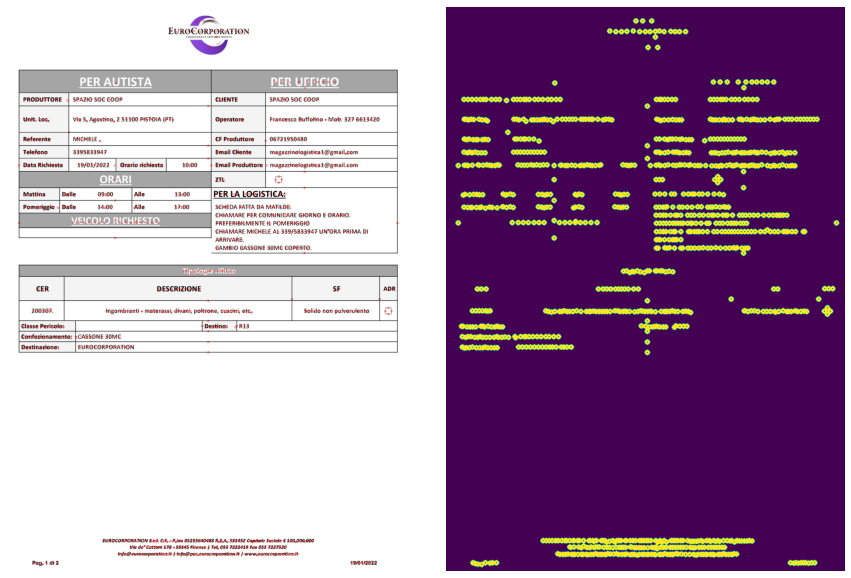

In [104]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(15,10))

plt.tight_layout()
plt.subplots_adjust(top=0.95, wspace=0.1, hspace=0)

points = []
for bbox in ocr_out.split('\n')[:-1]:
  # print(bbox)
  split = bbox.split(' ')
  text = split[0]
  point1 = (int(split[3]) + int(split[1])) / 2
  point2 =  (h -  int(split[4]) + h - int(split[2]))/2
  # print(text, point1, point2)
  points.append([point1,point2])
# print(points)
img = cv2.imread('converted_pdf2img//00.jpg')
white = np.zeros((h,w))
for point in points:
    x = int(point[0])
    y = int(point[1])
    img = cv2.circle(img, (x,y) , 3, (255,0,0))
    white = cv2.circle(white, (x,y) , 5, (255,255,255), 6)

plt.subplot(1,2,1)
#plt.title()
plt.imshow(img)
plt.axis('off')    

plt.subplot(1,2,2)
plt.imshow(white)
plt.axis('off')

plt.show()

In [105]:
clustering = DBSCAN(eps=27, min_samples=2).fit_predict(points)
# Just for nice plotting get a color for each cluster 
dico_color = {}
for i in range(np.max(clustering)+1):
    dico_color[i] = (random.randint(0,255),random.randint(0,255),random.randint(0,255))

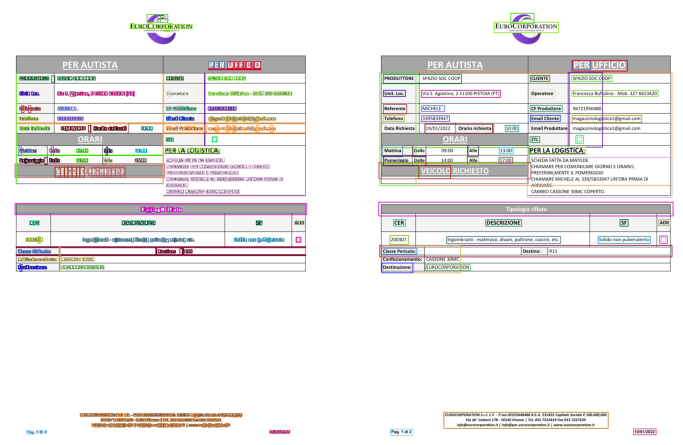

In [106]:
# Plot clusters
plt.figure(figsize=(12,16))
img = cv2.imread('converted_pdf2img//00.jpg')
h, w, _ = img.shape

# plot a rectangle around each character with the color of the cluster
for en,bbox in enumerate(ocr_out.split('\n')[:-1]):
    split = bbox.split(' ')
    text = split[0]
    bottom_left = (int(split[1]), h - int(split[2]))
    top_right = (int(split[3]), h -  int(split[4]))
    if clustering[en] != -1:
        img = cv2.rectangle(img, bottom_left, top_right, dico_color[clustering[en]], 2)

plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off')

#  plot a rectangle around each cluster 
img = cv2.imread('converted_pdf2img//00.jpg')
dico_area_location = {} #  store location of each cluster for the following
for i in range(np.max(clustering)+1):
    wh = np.where(clustering==i) #  select points from cluster i
    arr = np.array(ocr_out.split('\n'))[wh]
    LX,LY = [], []
    for en,bbox in enumerate(arr):
        split = bbox.split(' ')       
        LX.append(int(split[1]))
        LX.append(int(split[3]))   
        LY.append( h - int(split[2]))
        LY.append( h - int(split[4]))
    bottom_left = (min(LX)-5,min(LY)-5) # among every character in the cluster, take min(x), min(y)
    top_right = (max(LX)+5,max(LY)+5) # among every character in the cluster, take max(x), max(y)
    dico_area_location[i] = [bottom_left, top_right]

    img = cv2.rectangle(img, bottom_left, top_right, dico_color[i], 2) # draw a rectangle containing 
    #  every character in the cluster  

plt.subplot(1,2,2)
plt.imshow(img)
plt.axis('off')
plt.show()

Cluster 1


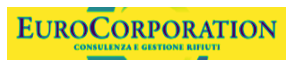

text extracted:  EUROCORPORATION



Cluster 3


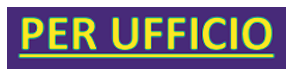

text extracted:  PER UFFICIO


Cluster 4


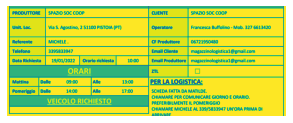

text extracted:  PRODUTTORE

SPAZIO SOC COOP. CLIENTE

Operatore

SPAZIO SOC COOP

Francesca Buffolino - Mob. 327 6613420

Unit. Loc. Via S. Agostino, 2 51100 PISTOIA (PT)
Referente | MICHELE . Sreat cine Produttore 06721950480
Telefono 3395833947 | Email Cliente | Cliente magazzinologistical @gmail.com

Data Richiesta

Mattina

ORARI

09:00

19/01/2022 10:00 Email Produttore

magazzinologistical @gmail.com

PER LA LOGISTICA:

Pomeriggio | Dalle

14:00

VEICOLO RICHIESTO

SCHEDA FATTA DA MATILDE.

CHIAMARE PER COMUNICARE GIORNO E ORARIO.
PREFERIBILMENTE IL POMERIGGIO

CHIAMARE MICHELE AL 339/5833947 UN'ORA PRIMA DI
ARRIVARE



Cluster 6


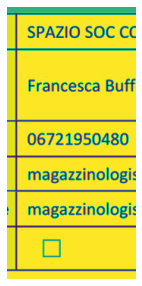

text extracted:  SPAZIO SOC CC
Francesca Buff

06721950480
magazzinologi:

.| magazzinologi:



Cluster 7


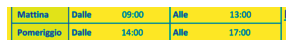

text extracted:  | Mattina _| Dalle 09:00 [Alle 13:00 !

Pomeriggio | Dalle 14:00 | Alle 17:00


Cluster 8


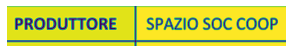

text extracted:  PRODUTTORE | SPAZIO SOC COOP


Cluster 9


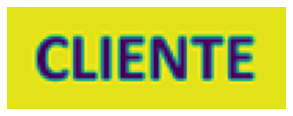

text extracted:  CLIENTE


Cluster 10


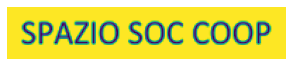

text extracted:  SPAZIO SOC COOP


Cluster 11


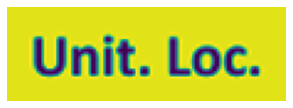

text extracted:  Unit. Loc.


Cluster 12


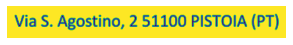

text extracted:  Via S. Agostino, 2 51100 PISTOIA (PT)


Cluster 13


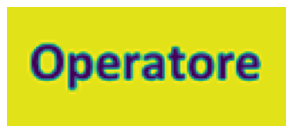

text extracted:  Operatore


Cluster 14


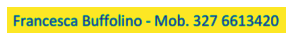

text extracted:  Francesca Buffolino - Mob. 327 6613420


Cluster 15


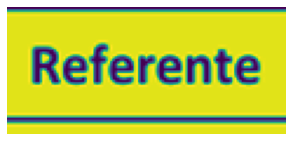

text extracted:  Referente


Cluster 16


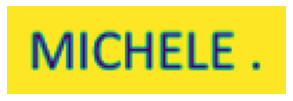

text extracted:  MICHELE .


Cluster 17


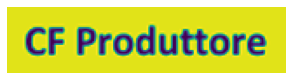

text extracted:  CF Produttore


Cluster 18


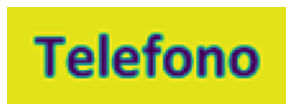

text extracted:  Telefono


Cluster 19


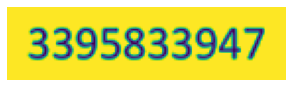

text extracted:  3395833947


Cluster 20


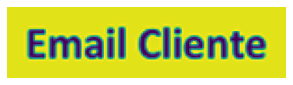

text extracted:  Email Cliente


Cluster 21


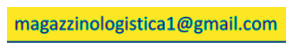

text extracted:  magazzinologistical@gmail.com



Cluster 22


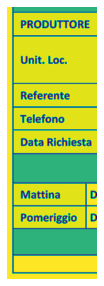

text extracted:  PRODUTTORE
Unit. Loc.

Referente
Telefono

Data

hiesta

Mattina

Pomeriggio | D


Cluster 23


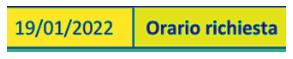

text extracted:  19/01/2022 | Orar



Cluster 24


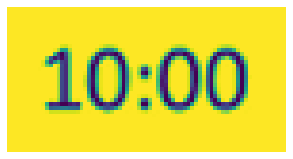

text extracted:  10:00


Cluster 25


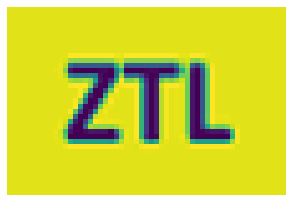

text extracted:  ZTL


Cluster 26


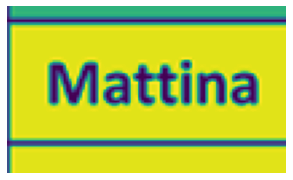

text extracted:  Mattina


Cluster 29


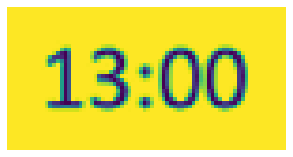

text extracted:  13:00


Cluster 30


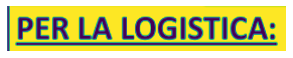

text extracted:  PER LA LOGISTICA:


Cluster 31


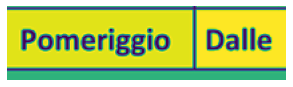

text extracted:  Pomeriggio | Dalle


Cluster 32


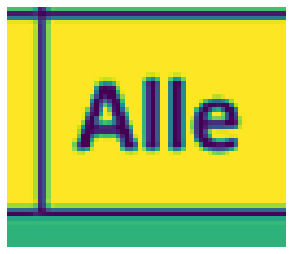

text extracted:  Alle



Cluster 33


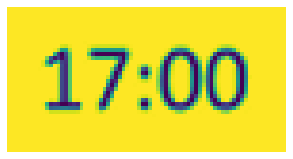

text extracted:  17:00


Cluster 34


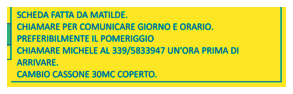

text extracted:  SCHEDA FATTA DA MATILDE.

CHIAMARE PER COMUNICARE GIORNO E ORARIO.
PREFERIBILMENTE IL POMERIGGIO

CHIAMARE MICHELE AL 339/5833947 UN'ORA PRIMA DI
ARRIVARE.

CAMBIO CASSONE 30MC COPERTO.



Cluster 35


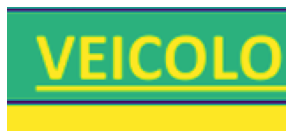

text extracted:  Wd (e(e) Ke)


Cluster 36


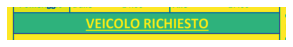

text extracted:  VEICOLO RICHIESTO


Cluster 37


text extracted:  Tipologia rifiuto


Cluster 39


text extracted:  Classe Pericolo: Destino: | R13



Cluster 40


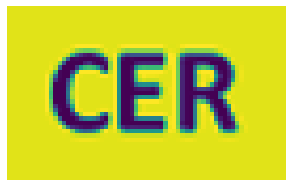

text extracted:  CER


Cluster 41


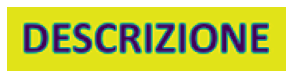

text extracted:  DESCRIZIONE


Cluster 42


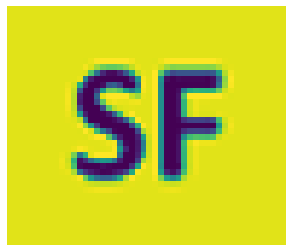

text extracted:  SF


Cluster 43


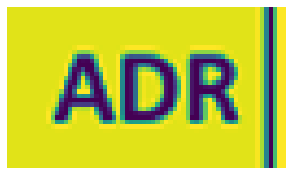

text extracted:  ADR


Cluster 44


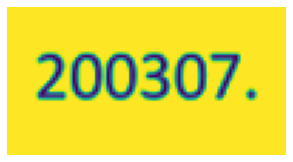

text extracted:  200307.


Cluster 45


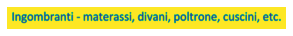

text extracted:  Ingombranti - materassi, divani, poltrone, cuscini, etc.


Cluster 46


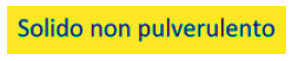

text extracted:  Solido non pulverulento


Cluster 47


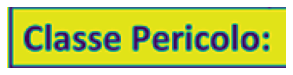

text extracted:  Classe Pericolo


Cluster 48


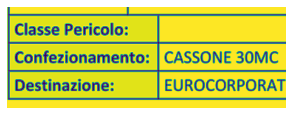

text extracted:  Classe Pericolo:

Confezionamento: | CASSONE 30MC
Destinazione: EUROCORPORAT



Cluster 50


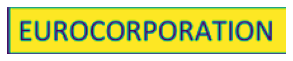

text extracted:  EUROCORPORATION


Cluster 51


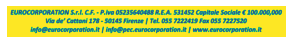

text extracted:  EUROCORPORATION S.r.l. C.F. - P.iva 05235640488 R.E.A. 531452 Capitale Sociale € 100.000,000
Via de’ Cattani 178 - 50145 Firenze | Tel. 055 7222419 Fax 055 7227520
info@eurocorporation.it | info@pec.eurocorporation.it | www.eurocorporation.it


Cluster 52


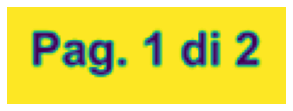

text extracted:  Pag. 1 di2


Cluster 53


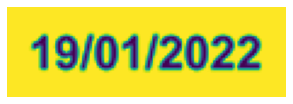

text extracted:  19/01/2022




In [107]:
img = cv2.imread('converted_pdf2img//00.jpg') 
to_pop_list = []

for cluster in dico_area_location:
    [bottom_left, top_right] = dico_area_location[cluster]
    pad = 4 #  add some pixels around cluster area
    img_crop = img[ bottom_left[1] - pad :top_right[1] + pad, bottom_left[0] - pad:top_right[0] + pad , :]
    # The cropped image can have weird shape and tesseract OCR is more accurate if we transform the cropped image as followed
    img_crop = cv2.resize(img_crop, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_CUBIC) 
    img_crop = cv2.cvtColor(img_crop, cv2.COLOR_BGR2GRAY)
    # Run tesseract on the cropped image
    text = pytesseract.image_to_string(img_crop)
    if text != '': 
        print('Cluster {}'.format(cluster))
        plt.figure(figsize=(5,5))
        plt.imshow(img_crop)
        plt.axis('off')
        plt.show()
        print('text extracted: ', text)
        print()
        dico_area_location[cluster].append(text)
    else:
        to_pop_list.append(cluster)
        
# Remove area without text        
for i in to_pop_list:
    dico_area_location.pop(i)

# Ensure no key is skipped due to removal
dico_area_location_copy = {}
for en, key in enumerate(dico_area_location):
    dico_area_location_copy[en] = dico_area_location[key]
dico_area_location = dico_area_location_copy 

In [99]:
# receipt_files=glob('../input/pdf-samples/Esempio ordini/*')
# receipt_files
pdffile = "//Esempio ordini//CAMBIO CASSONE SPAZIO SOC COOP PISTOIA 19.01.2022.pdf"
doc = fitz.open(pdffile)
page = doc.loadPage(0)  # number of page
pix = page.get_pixmap()
output = "outfile.png"
pix.save(output)

mupdf: cannot open //Esempio ordini//CAMBIO CASSONE SPAZIO SOC COOP PISTOIA 19.01.2022.pdf: Invalid argument


RuntimeError: cannot open //Esempio ordini//CAMBIO CASSONE SPAZIO SOC COOP PISTOIA 19.01.2022.pdf: Invalid argument

In [ ]:

dfQueryAnsr.head()

In [ ]:
df_table1.head()

In [ ]:
df_table2.head()

In [ ]:
df_table3.head()

In [ ]:
df_table4.head()

In [ ]:
df_table5.head()

In [ ]:
df_table6.head()

### Experiment with PyMuPDF

In [ ]:
!pip install PyMuPDF==1.19.5
import fitz

In [ ]:
doc = fitz.open('../input/pdf-set/table.pdf') 
print("Processing file '%s' with %i pages." % (doc.name, doc.page_count))

In [ ]:
for page in doc:
    print()
    # make list of relevant drawing rectangles:
    # type "fill", large enough, not transparent
    seq_paths = [
        (p["seqno"], p["rect"].irect)  # just use the IRect: precise enough
        for p in page.get_drawings()
        if p["rect"].width > 3  # exclude lines
        and p["rect"].height > 3  # exclude lines
        and p["type"][0] == "f"  # only fill or fill-stroke
        and p["fill_opacity"] == 1  # not transparent
    ]
    if seq_paths == []:
        print("No solid drawings on page %i.")
        continue
    print(
        "Page %i has %i solid drawings. Sequence numbers:"
        % (page.number, len(seq_paths))
    )
    print([s[0] for s in seq_paths])
    print()
    textspans = page.get_texttrace()  # get the text spans

    for span in textspans:
        span_seqno = span["seqno"]  # the text painting sequence number
        span_rect = fitz.Rect(span["bbox"])
        paths = [  # restrict to overlapping drawings occurring "later"
            p
            for p in seq_paths
            if p[0] >= span_seqno and not (p[1] & span_rect).is_empty
        ]
        if paths == []:  # this text span is clean
            continue
        for seqno, draw_rect in paths:  # this iterates over only 1 item normally
            problems = []
            for ch in span["chars"]:  # walk through characters in the span
                char = chr(ch[0])  # the character
                bbox = fitz.Rect(ch[3])  # its bbox
                if abs(bbox & draw_rect) >= abs(bbox) * 0.8:
                    problems.append(char)
            if problems != []:
                print("Drawing %i covers %s." % (seqno, ", ".join(problems)))